In [36]:
# Imports
# data analysis and wrangling
import pandas as pd
import numpy as np
import os
import random

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#settings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
sns.set(style="whitegrid")

import reuse_function as reuse
import importlib
importlib.reload(reuse)

<module 'reuse_function' from 'C:\\Users\\agupt84\\Desktop\\ML\\Mtech\\Semester - I\\DM - Data Mining\\assignment\\Assignment_DelhiBatch\\coronary-heart-disease-prediction\\reuse_function.py'>

In [2]:
# Read data
raw_df = pd.read_csv(r'C:\Users\agupt84\Desktop\ML\Mtech\Semester - I\DM - Data Mining\assignment\Assignment_DelhiBatch\coronary-heart-disease-prediction\data.csv')

In [3]:
raw_df.head()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
0,1443894,2049,44,8.0,11,0,0,0,0,38,123,230,27,330,0,0,0.52,0.69,0,0,0,1,17.078971,0,0
1,1810849,48,0,8.0,0,0,0,0,0,1,1,1,27,1,0,0,0.59,0.78,1,0,0,1,17.022384,0,0
2,2264999,318,2,9.0,0,0,0,0,0,0,1,2,27,2,0,0,0.94,0.79,1,0,0,0,17.024773,0,0
3,1931676,62,4,2.0,0,0,0,15,30,7,24,42,27,71,0,0,0.51,0.47,0,0,0,1,17.074995,0,0
4,2070885,2,0,8.0,0,0,0,0,1,0,0,2,27,2,0,0,0.82,0.81,0,0,0,1,17.072697,0,0


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34281 entries, 0 to 34280
Data columns (total 25 columns):
ID        34281 non-null int64
IV        34281 non-null int64
A1        34281 non-null int64
A2        32538 non-null float64
A3        34281 non-null int64
A4        34281 non-null int64
A5        34281 non-null int64
A6        34281 non-null int64
A7        34281 non-null int64
A8        34281 non-null int64
A9        34281 non-null int64
A10       34281 non-null int64
A11       34281 non-null int64
A12       34281 non-null int64
A13       34281 non-null int64
A14       34281 non-null int64
A15       34281 non-null float64
A16       34281 non-null float64
A17       34281 non-null int64
A18       34281 non-null int64
A19       34281 non-null int64
A20       34281 non-null int64
A21       34281 non-null float64
A22       34281 non-null int64
Target    34281 non-null int64
dtypes: float64(4), int64(21)
memory usage: 6.5 MB


### EDA (Exploratory Data Analysis)

##### 1. Visualizing Distribution of Target Column

   Target  Counts    pct
0       0   22988  67.06
1       1   11293  32.94


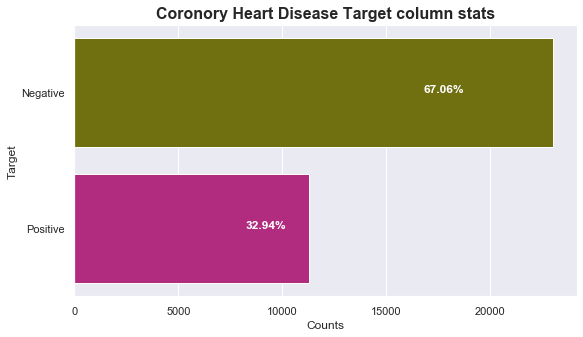

In [5]:
# Target column analysis
sns.set(style="darkgrid")
targetcoldf = raw_df.groupby('Target').agg({'Target':['count']}).reset_index()
targetcoldf.columns = ['Target','Counts']
targetcoldf['pct'] = round(targetcoldf['Counts']/(len(raw_df))*100,2)
palette = ['olive','mediumvioletred']
print (targetcoldf.head())
fig, ax = plt.subplots(figsize=(9,5))
fig = sns.barplot(x='Counts', y='Target',data=targetcoldf, ci = None, orient='h', palette=palette)

y_lab = ['Negative', 'Positive']
ax.set_yticklabels(labels=y_lab, ha='right')

for i, v in enumerate(targetcoldf['pct']):
    ax.text(v*250, i, str(v)+'%', color='white', fontweight='bold')

plt.title('Coronory Heart Disease Target column stats',size = 16, weight = 'bold')
plt.ylabel('Target')
plt.xlabel('Counts');


##### The Target class looks fine.

##### 2. Check Columns with Missing Data 

Index(['A2'], dtype='object')
A2    5.08
dtype: float64


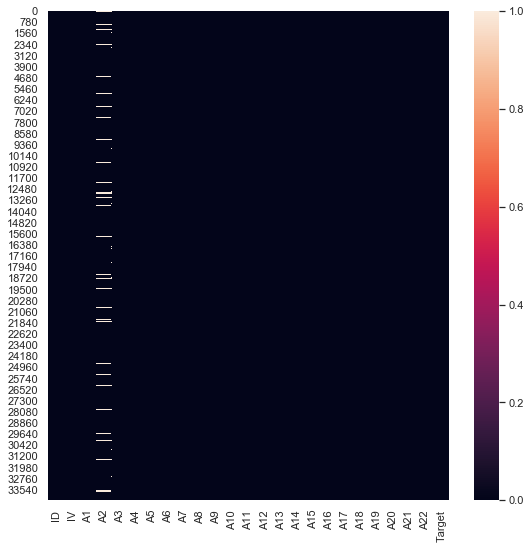

In [6]:
reuse.check_missing_data(raw_df,plot='y')

##### A2 column has missing data of ~5%. It needs to be imputed.

In [43]:
len(raw_df)

34281

In [49]:
np.mean(raw_df['A2'])

7.355184707111685

In [48]:
# Treat missing values:
# raw_df[raw_df['A2'].isnull() == True]['A2'] = np.mean(raw_df['A2'])

1743

In [8]:
raw_df.describe()

,ID,IV,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,Target
count,3.428100e+04,34281.000000,34281.000000,32538.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.0,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000,34281.000000
mean,1.979838e+06,236.252005,36.126367,7.355185,22.543071,1.695371,151.959044,274.418453,387.933637,36.482746,132.947551,236.647122,27.0,341.151863,0.001838,1.744757,-5.742893,-5.368822,0.208658,0.000321,0.131939,0.962370,17.049826,0.000204,0.329424
std,6.384855e+05,3326.574620,427.707021,6.165307,359.486291,36.195759,2274.087109,4065.441226,5443.804648,375.931751,4151.795360,4528.960060,0.0,5005.764257,0.042830,26.077507,24.618128,23.938095,0.406355,0.017910,0.338429,0.190303,0.028818,0.014288,0.470011
min,1.058628e+06,-2999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.0,0.000000,0.000000,0.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.000000,17.000005,0.000000,0.000000
25%,1.464342e+06,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.0,0.000000,0.000000,0.000000,0.590000,0.610000,0.000000,0.000000,0.000000,1.000000,17.024869,0.000000,0.000000
50%,1.841719e+06,8.000000,0.000000,8.000000,0.000000,0.000000,0.000000,2.000000,4.000000,1.000000,3.000000,6.000000,27.0,8.000000,0.000000,0.000000,0.810000,0.790000,0.000000,0.000000,0.000000,1.000000,17.049813,0.000000,0.000000
75%,2.254242e+06,40.000000,4.000000,8.000000,0.000000,0.000000,18.000000,33.000000,48.000000,6.000000,19.000000,37.000000,27.0,54.000000,0.000000,0.000000,0.960000,0.940000,0.000000,0.000000,0.000000,1.000000,17.074796,0.000000,1.000000
max,3.274754e+06,366924.000000,50547.000000,52.000000,31750.000000,2999.000000,260660.000000,438020.000000,533540.000000,21071.000000,742110.000000,742750.000000,27.0,743215.000000,1.000000,1488.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.099995,1.000000,1.000000


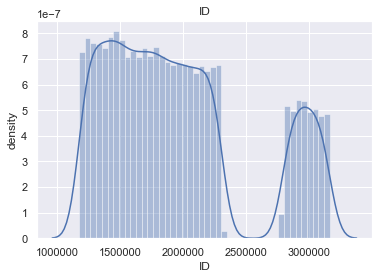

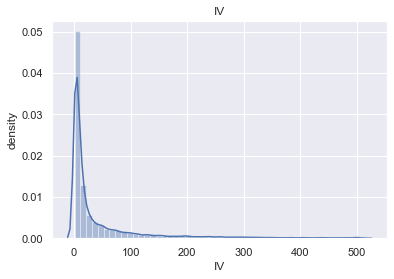

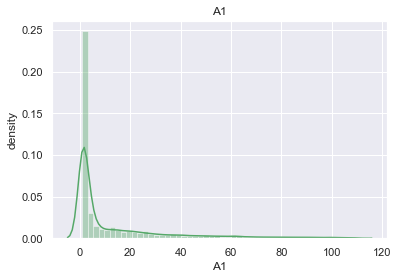

C:\Users\agupt84\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


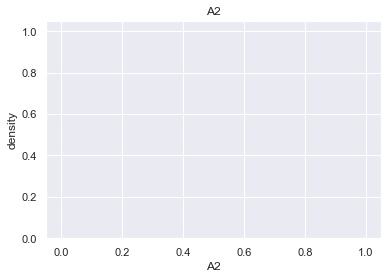

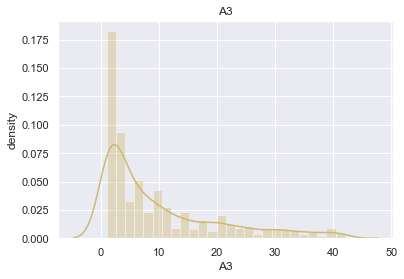

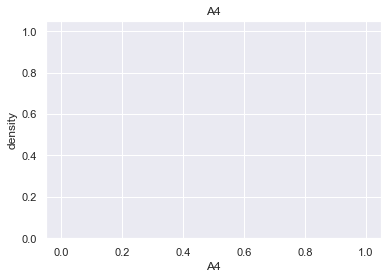

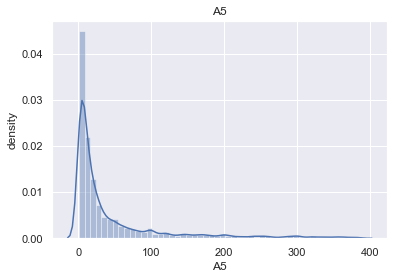

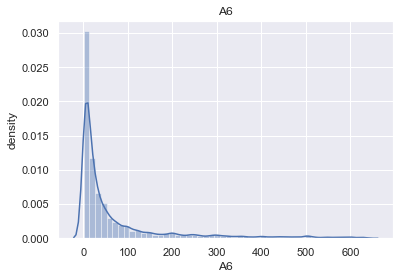

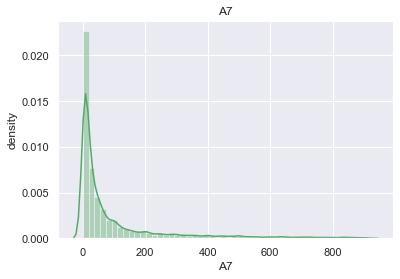

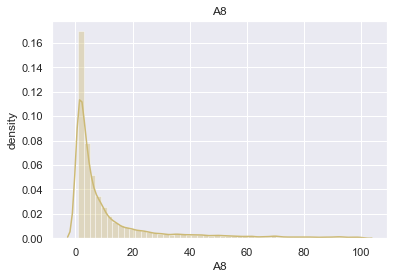

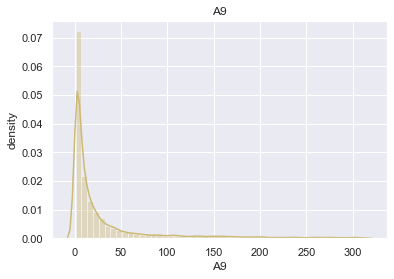

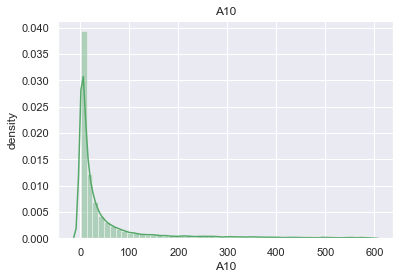

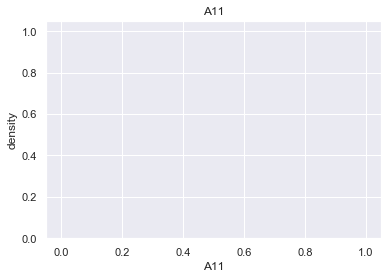

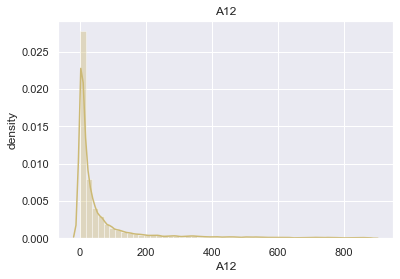

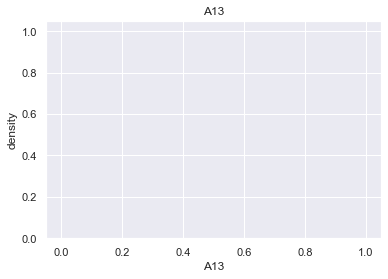

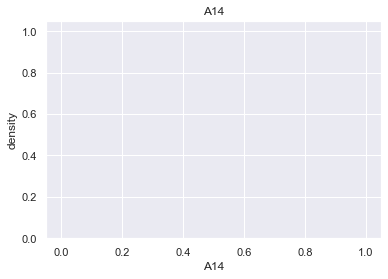

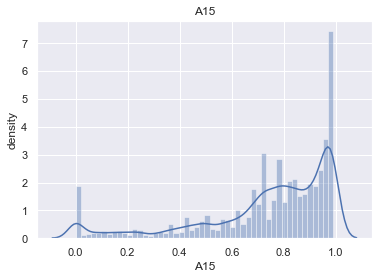

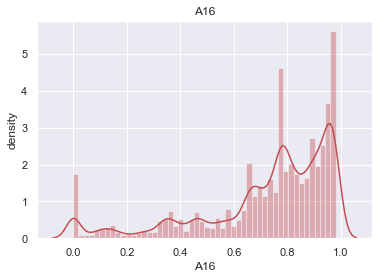

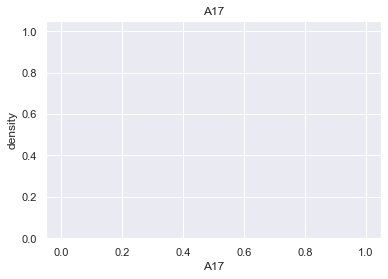

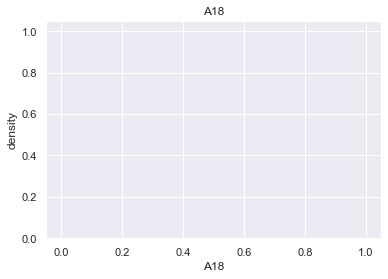

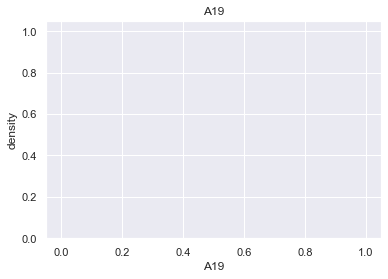

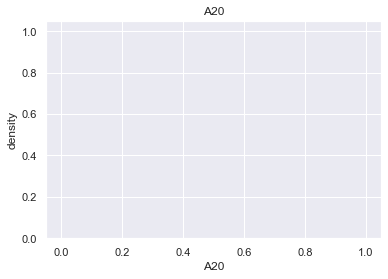

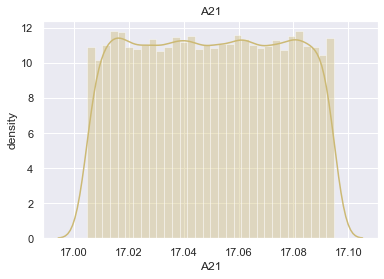

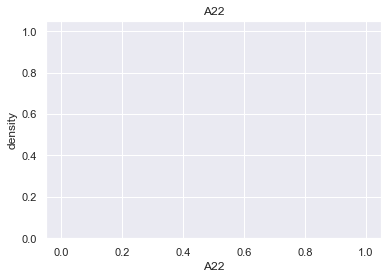

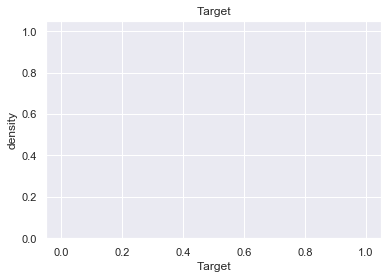

In [37]:
##### 3. Generating Univariate plots
reuse.distplot_numericdata(raw_df)

##### 3. Check Correlation between columns using Heatmap

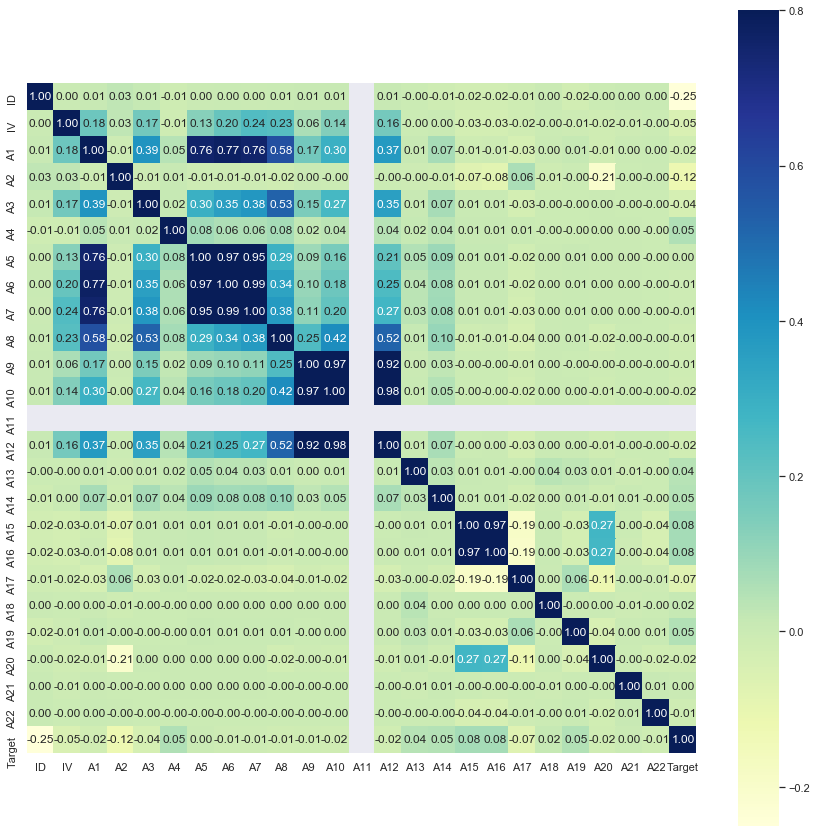

In [11]:
corr_matrix = raw_df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix,
           vmax=.8,
           square=True,
           annot=True,
           fmt='.2f',
           cmap='YlGnBu')

#### EDA Observations:
> Correlation Observations:
 - Column **A5,A6,A7** are correlated with each other. Thus, **A5,A6 can be dropped.**  
 - Column **A15, A16** are also correlated with each other. Thus, **A15 can be dropped.**  
 - Columns **A9, A10, A12** are also strongly correlated with each other. Thus, **A9, A10 can be dropped.**  
 - Columns **A5, A21** shows **NO corelation** with '**Target**' column. These can be dropped as well.  

> Other observations:
 - Column A11 can be dropped as all rows carries same value. Thus, no information can be gained from this.
 - Column ID can be dropped as all values are unique. Thus, no information can be gained from this.

In [18]:
# Drop columns based on Correlation analysis
cols_to_drop = ['ID','A5','A6','A9','A10','A11','A15','A21']
df_post_eda = raw_df.drop(columns=cols_to_drop, axis=1)

In [19]:
df_post_eda.head()

,IV,A1,A2,A3,A4,A7,A8,A12,A13,A14,A16,A17,A18,A19,A20,A22,Target
0,2049,44,8.0,11,0,0,38,330,0,0,0.69,0,0,0,1,0,0
1,48,0,8.0,0,0,0,1,1,0,0,0.78,1,0,0,1,0,0
2,318,2,9.0,0,0,0,0,2,0,0,0.79,1,0,0,0,0,0
3,62,4,2.0,0,0,30,7,71,0,0,0.47,0,0,0,1,0,0
4,2,0,8.0,0,0,1,0,2,0,0,0.81,0,0,0,1,0,0


In [38]:
pd.crosstab(index=df_post_eda['A2'], columns=df_post_eda['Target'])

Target,0,1
A2,,
0.0,152,162
2.0,4430,3457
3.0,215,204
4.0,1794,475
5.0,44,52
6.0,59,54
7.0,1,1
8.0,9347,4744
9.0,1723,536


### Pre-processing